In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('../assets/ML-CUP24-TR.csv')

features = [f'FEATURE_{i}' for i in range(1, 12)]
targets = ['TARGET_x', 'TARGET_y', 'TARGET_z']

X = dataset[features]
y = dataset[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(200, 11) (50, 11) (200, 3) (50, 3)


In [5]:
y_test.describe()

,TARGET_x,TARGET_y,TARGET_z
count,50.000000,50.000000,50.000000
mean,0.084049,-0.183370,6.819168
std,0.908132,0.813162,9.965540
min,-1.949109,-2.497381,-9.488706
25%,-0.402904,-0.505833,-0.858733
50%,-0.053661,-0.053932,6.035006
75%,0.555840,0.371126,14.171538
max,2.315885,1.313917,25.311383


Epoch 1/100


/Users/leonardocrociani/Documents/GitHub/From-Scratch-Neural-Network/checker/checker-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 58.1198 - val_loss: 44.3782
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.4178 - val_loss: 38.1924
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.1284 - val_loss: 31.4818
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.1491 - val_loss: 23.9246
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.3228 - val_loss: 15.3176
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.9146 - val_loss: 7.1351
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3972 - val_loss: 2.2345
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1925 - val_loss: 1.1573
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6476 - val_loss: 1.2125
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4828 - val_loss: 1.0976
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0807 - val_loss: 1.0432
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1056 - val_loss: 0.8550
Ep

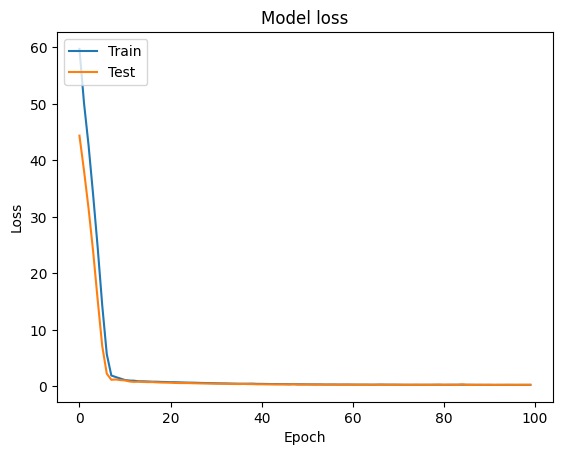

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


np.float64(0.27021833249900923)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(128, input_dim=11, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

def plot_trainig_curve(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
plot_trainig_curve(model.history)

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

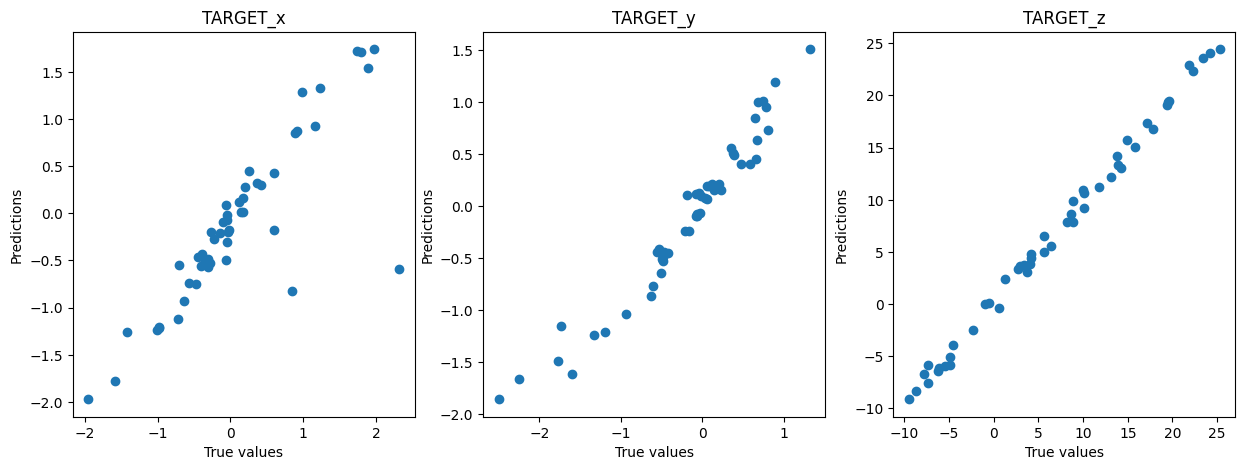

In [6]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(15, 5))
    for i, target in enumerate(targets):
        plt.subplot(1, 3, i+1)
        plt.scatter(y_test[target], y_pred[:, i])
        plt.xlabel('True values')
        plt.ylabel('Predictions')
        plt.title(target)
    plt.show()
    
plot_predictions(y_test, y_pred)